## Dataset

Econometric Analysis: [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
```
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column `card`). 

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-01 14:24:46--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: 'AER_credit_card_data.csv'

     0K .......... .......... .......... .......... .......... 69%  749K 0s
    50K .......... .......... .                               100% 16.8M=0.07s

2022-10-01 14:24:47 (1.03 MB/s) - 'AER_credit_card_data.csv' saved [73250/73250]



## Preparation

* Create the target variable by mapping `yes` to 1 and `no` to 0. 
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`.

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [331]:
df = pd.read_csv('AER_credit_card_data.csv')

In [332]:
df.head(n=5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [333]:
x = df[df['card'] == 'yes']
y = df[df['card'] == 'no']
print(len(x), len(y))

1023 296


In [334]:
df["card"] = np.where(df["card"] == "yes", 1, 0)

In [335]:
df.head(n=5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [336]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [337]:
df_train, df_val = train_test_split( df_full_train, test_size=0.25, random_state=1)

In [338]:
y_train = df_train['card']
y_val = df_val['card']
y_test = df_test['card']
del df_train['card']
del df_val['card']
del df_test['card']

In [306]:
df_full_train
y_full_train = df_full_train['card']
del df_full_train['card']

In [329]:
y_full_train

710     0
1258    1
435     1
987     0
1286    1
       ..
715     1
905     1
1096    1
235     1
1061    1
Name: card, Length: 1055, dtype: int32

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `reports`
- `dependents`
- `active`
- `share`

In [261]:
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, precision_score, confusion_matrix, auc

In [262]:
df.dtypes

card             int32
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [263]:
numerical_df = df_train.select_dtypes(exclude='object')
numerical = numerical_df.columns
numerical = numerical.tolist()
numerical

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [264]:
df_train[numerical]

,reports,age,income,share,expenditure,dependents,months,majorcards,active
1105,3,40.50000,4.0128,0.000299,0.00000,1,12,1,17
431,1,32.33333,6.0000,0.000200,0.00000,4,18,1,4
407,1,29.16667,2.2000,0.038205,69.79333,0,49,1,7
1217,1,54.66667,7.2900,0.106536,647.20670,2,78,1,9
1133,0,25.00000,3.3984,0.000353,0.00000,2,29,0,4
...,...,...,...,...,...,...,...,...,...
416,0,53.00000,2.4500,0.017718,35.67500,0,3,1,11
1162,2,30.58333,2.5000,0.000480,0.00000,0,12,1,18
128,0,24.75000,1.8750,0.080708,126.02250,1,14,0,1
413,1,56.91667,3.4838,0.062895,182.09580,0,540,1,7


In [265]:
auc_score_list = {}
def auc_score(numerical_cols, y_train, df_train):
    for col in numerical_cols:
        auc = roc_auc_score(y_train, df_train[col])
        if auc < 0.5:
            auc = roc_auc_score(y_train, -df_train[col])
        auc_score_list.update({col: auc})
        print(f'for the column {col}, the AUC score is: {auc:.3f}')
    print('\n')
    print(f'Column with MAX AUC is {max(auc_score_list, key=auc_score_list.get)}')
    print(f'MAX AUC value is {max(auc_score_list.values())}')
    

In [266]:
auc_score(numerical, y_train, df_train)

for the column reports, the AUC score is: 0.717
for the column age, the AUC score is: 0.524
for the column income, the AUC score is: 0.591
for the column share, the AUC score is: 0.989
for the column expenditure, the AUC score is: 0.991
for the column dependents, the AUC score is: 0.533
for the column months, the AUC score is: 0.529
for the column majorcards, the AUC score is: 0.534
for the column active, the AUC score is: 0.604


Column with MAX AUC is expenditure
MAX AUC value is 0.991042345276873


In [267]:
cols_of_interest = ["reports", "dependents", "active", "share"]
res = dict((k, auc_score_list[k]) for k in cols_of_interest
           if k in auc_score_list)
print(f'results are: {res}\n')
print(f'Column with MAX AUC is {max(res, key=res.get)}')
print(f'MAX AUC value is {max(res.values())}')

results are: {'reports': 0.7166629860689376, 'dependents': 0.5327757227773791, 'active': 0.6043173411362006, 'share': 0.989183643423692}

Column with MAX AUC is share
MAX AUC value is 0.989183643423692


## Training the model

From now on, use these columns only:

```
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [268]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [271]:
col_subset = ["reports", "age", "income", "share", "expenditure", "dependents", 
              "months", "majorcards", "active", "owner", "selfemp"]

In [272]:
dictionarized_train = df_train[col_subset].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dictionarized_train)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [273]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [274]:
dictionarized_val = df_val[col_subset].to_dict(orient='records')
X_val = dv.transform(dictionarized_val)

In [275]:
y_pred = model.predict_proba(X_val)[:, 1]

In [276]:
roc_auc_score(y_val, y_pred)

0.995171242063847

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- 0.995

**0.995**

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them


At which threshold precision and recall curves intersect?

* 0.1
* 0.3
* 0.6
* 0.8




In [277]:
def threshold_evaluator(y_pred, y_val):
    scores = []
    threshold = np.linspace(0.0, 1.0, 101)
    for t in threshold:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred <t)
        tp = (predict_positive  & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    return df_scores

In [278]:
df_scores = threshold_evaluator(y_pred, y_val)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,211,53,0,0
10,0.1,210,17,1,36
20,0.2,207,5,4,48
30,0.3,205,5,6,48
40,0.4,205,1,6,52
50,0.5,204,1,7,52
60,0.6,204,1,7,52
70,0.7,204,1,7,52
80,0.8,204,1,7,52
90,0.9,204,0,7,53


In [279]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r
0,0.0,211,53,0,0,0.799242,1.000000
10,0.1,210,17,1,36,0.925110,0.995261
20,0.2,207,5,4,48,0.976415,0.981043
30,0.3,205,5,6,48,0.976190,0.971564
40,0.4,205,1,6,52,0.995146,0.971564
50,0.5,204,1,7,52,0.995122,0.966825
60,0.6,204,1,7,52,0.995122,0.966825
70,0.7,204,1,7,52,0.995122,0.966825
80,0.8,204,1,7,52,0.995122,0.966825
90,0.9,204,0,7,53,1.000000,0.966825


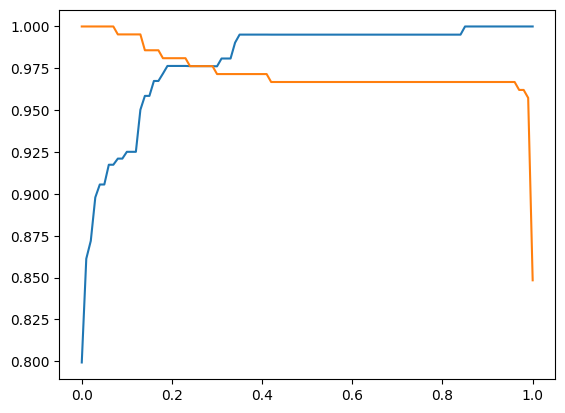

In [280]:
plt.plot(df_scores.threshold, df_scores.p)
plt.plot(df_scores.threshold, df_scores.r)

In [224]:
#only as a test, skip this please
def alternate_function(y_val, y_pred):
    scores = []
    threshold = np.linspace(0.0, 1.0, 101)
    for t in threshold:
        y_pred = (model.predict_proba(X_val)[:, 1] > t).astype('float')
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        CM = confusion_matrix(y_val, y_pred)
        TN = CM[0][0]
        FN = CM[1][0]
        TP = CM[1][1]
        FP = CM[0][1]
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        scores.append((t, TP, FN, TP, FP, precision, recall))
    columns = ['Threshold', 'TP', 'FP', 'FN', 'TN', 'Precision', 'Recall']
    df_scores = pd.DataFrame(scores, columns=columns)
    return df_scores

In [225]:
scores = alternate_function(y_val, y_pred)

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
scores[::10]

,Threshold,TP,FP,FN,TN,Precision,Recall
0,0.0,211,0,211,53,0.799242,1.000000
10,0.1,210,1,210,17,0.925110,0.995261
20,0.2,207,4,207,5,0.976415,0.981043
30,0.3,205,6,205,5,0.976190,0.971564
40,0.4,205,6,205,1,0.995146,0.971564
50,0.5,204,7,204,1,0.995122,0.966825
60,0.6,204,7,204,1,0.995122,0.966825
70,0.7,204,7,204,1,0.995122,0.966825
80,0.8,204,7,204,1,0.995122,0.966825
90,0.9,204,7,204,0,1.000000,0.966825


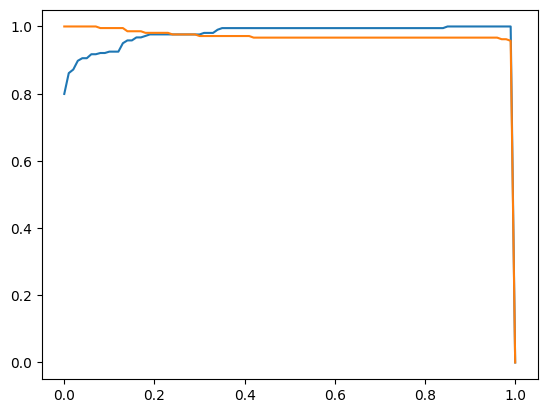

In [227]:
plt.plot(scores['Threshold'], scores['Precision'])
plt.plot(scores['Threshold'], scores['Recall'])

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.1
- 0.4
- 0.6
- 0.7




In [287]:
df_scores['f1'] = (2 * df_scores['p'] * df_scores['r']) / (df_scores['p'] + df_scores['r'])
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r,f1
0,0.0,211,53,0,0,0.799242,1.000000,0.888421
10,0.1,210,17,1,36,0.925110,0.995261,0.958904
20,0.2,207,5,4,48,0.976415,0.981043,0.978723
30,0.3,205,5,6,48,0.976190,0.971564,0.973872
40,0.4,205,1,6,52,0.995146,0.971564,0.983213
50,0.5,204,1,7,52,0.995122,0.966825,0.980769
60,0.6,204,1,7,52,0.995122,0.966825,0.980769
70,0.7,204,1,7,52,0.995122,0.966825,0.980769
80,0.8,204,1,7,52,0.995122,0.966825,0.980769
90,0.9,204,0,7,53,1.000000,0.966825,0.983133


In [300]:
max_value = df_scores[df_scores['f1'].index == np.argmax(df_scores['f1'])]
max_value

,threshold,tp,fp,fn,tn,p,r,f1
35,0.35,205,1,6,52,0.995146,0.971564,0.983213


## Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the AUC scores across different folds?

- 0.003
- 0.014
- 0.09
- 0.24




In [318]:
from sklearn.model_selection import KFold, cross_validate, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

In [322]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [323]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [346]:
columns = ["reports", "age", "income", "share", "expenditure", "dependents", 
              "months", "majorcards", "active", "owner", "selfemp"]

In [347]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred= model.predict_proba(X)[:,1]
    return y_pred

In [349]:
scores = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.card.values
    y_val = df_val.card.values
    
    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
print(f'{np.mean(scores):.3f},{np.std(scores):.3f}')

0.996,0.003


STD = 0.003

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [358]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for C in [0.01, 0.1, 1, 10]:
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=1.0)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print(f'{C},{np.mean(scores)},{np.std(scores)}')

0.01,0.9964498276814243,0.0027434713804377724
0.1,0.9964498276814243,0.0027434713804377724
1,0.9964498276814243,0.0027434713804377724
10,0.9964498276814243,0.0027434713804377724


**0.01**